In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
x_data = np.load('/content/drive/MyDrive/DL/x_main_data.npy')
y_data = np.load("/content/drive/MyDrive/DL/y_main_data.npy")

In [ ]:
x_data.shape,y_data.shape

((2000, 250, 250, 3), (2000, 1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 34,shuffle = True)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1400, 250, 250, 3), (600, 250, 250, 3), (1400, 1), (600, 1))

In [ ]:
names = ["Ipsala","Arborino","Jasmine","Basmati"]
def img_show(index):
    plt.figure(figsize = (10,1))
    value = y_train[index]
    print(names[value[0]])
    plt.imshow(x_train[index])

Arborino


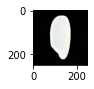

In [ ]:
img_show(34)

Basmati


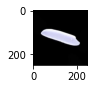

In [ ]:
img_show(44)

Basmati


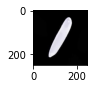

In [ ]:
img_show(30)

Basmati


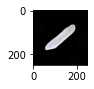

In [ ]:
img_show(1)

Ipsala


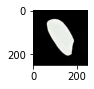

In [ ]:
img_show(500)

Ipsala


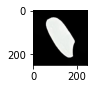

In [ ]:
img_show(151)

Ipsala


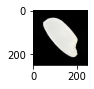

In [ ]:
img_show(9)

Arborino


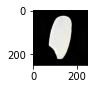

In [ ]:
img_show(2)

Basmati


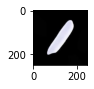

In [ ]:
img_show(345)

Ipsala


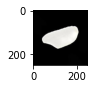

In [ ]:
img_show(0)

In [ ]:
x_train_scaled = x_train/250
x_test_scaled = x_test/250

In [ ]:
x_train_scaled.shape,x_test_scaled.shape

((1400, 250, 250, 3), (600, 250, 250, 3))

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(250, 250, 3)),
        keras.layers.Dense(2000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])


In [ ]:

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(250,250,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=100)


Epoch 1/100
44/44 [==============================] - 6s 69ms/step - loss: 2.6297 - accuracy: 0.3993
Epoch 2/100
44/44 [==============================] - 3s 68ms/step - loss: 0.8859 - accuracy: 0.5071
Epoch 3/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8555 - accuracy: 0.5229
Epoch 4/100
44/44 [==============================] - 3s 68ms/step - loss: 0.8362 - accuracy: 0.5271
Epoch 5/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8410 - accuracy: 0.4964
Epoch 6/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8288 - accuracy: 0.5200
Epoch 7/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8338 - accuracy: 0.5214
Epoch 8/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8374 - accuracy: 0.4914
Epoch 9/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8318 - accuracy: 0.4979
Epoch 10/100
44/44 [==============================] - 3s 67ms/step - loss: 0.8203 - accuracy: 0.5221

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, "/content/drive/MyDrive/DL/model.h5")

In [ ]:
# from numpy import loadtxt
# from tensorflow.keras.models import load_model
 
# model = load_model('/content/drive/MyDrive/DL/model.h5')
# model.summary()
# # X = dataset[:,0:8]
# # Y = dataset[:,8]
# # score = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
!git config --global user.email "nileshshindeofficial@gmail.com"
!git config --global user.name "nileshshinde09"

In [ ]:
!git push

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git clone https://github.com/Nileshshinde09/Deep-Learning-Rice-Image-Classification.git

Cloning into 'Deep-Learning-Rice-Image-Classification'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
!cd Deep-Learning-Rice-Image-Classification